<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

In [ ]:
# Load the Data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0
print('X_train shape:', X_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)


In [ ]:
# Data is only 2D --------> CNN expects height x width x color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [ ]:
# Determine number of classes
K = len(set(y_train))
print('Number of classes:', K)

Number of classes: 10


In [ ]:
# Build the model using functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: Make sure you are using a GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.7451 - loss: 0.6990 - val_accuracy: 0.8509 - val_loss: 0.3996
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8598 - loss: 0.3720 - val_accuracy: 0.8661 - val_loss: 0.3560
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8790 - loss: 0.3183 - val_accuracy: 0.8871 - val_loss: 0.3100
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8952 - loss: 0.2774 - val_accuracy: 0.8956 - val_loss: 0.3000
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.9055 - loss: 0.2485 - val_accuracy: 0.8970 - val_loss: 0.2920
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 24ms/step - accuracy: 0.9147 - loss: 0.2201 - val_accuracy: 0.8962 - val_loss: 0.2896
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 29ms/step - accuracy: 0.9218 - loss: 0.2049 - val_accuracy: 0.9002 - val_loss: 0.2894
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 23ms/step - accuracy: 0.9293 -

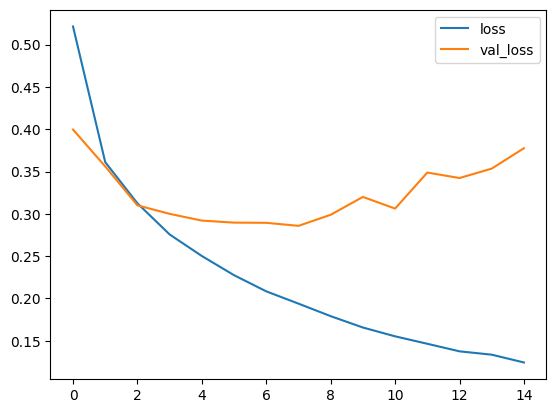

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

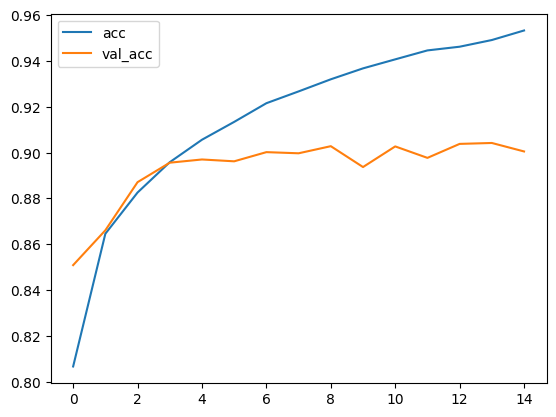

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


(array([[864,   0,  13,  20,   5,   3,  88,   0,   7,   0],
        [  1, 973,   1,  17,   3,   1,   2,   0,   2,   0],
        [ 15,   2, 787,  11,  72,   0, 112,   0,   1,   0],
        [ 13,   2,  13, 893,  44,   1,  33,   0,   1,   0],
        [  0,   0,  34,  16, 863,   1,  83,   0,   3,   0],
        [  0,   0,   0,   1,   0, 975,   0,  13,   1,  10],
        [ 90,   2,  37,  34,  76,   1, 740,   0,  19,   1],
        [  0,   0,   0,   0,   0,   9,   0, 964,   0,  27],
        [  2,   0,   1,   4,   6,   1,   2,   3, 980,   1],
        [  0,   0,   0,   0,   0,   4,   1,  28,   1, 966]]),
 <Axes: >)

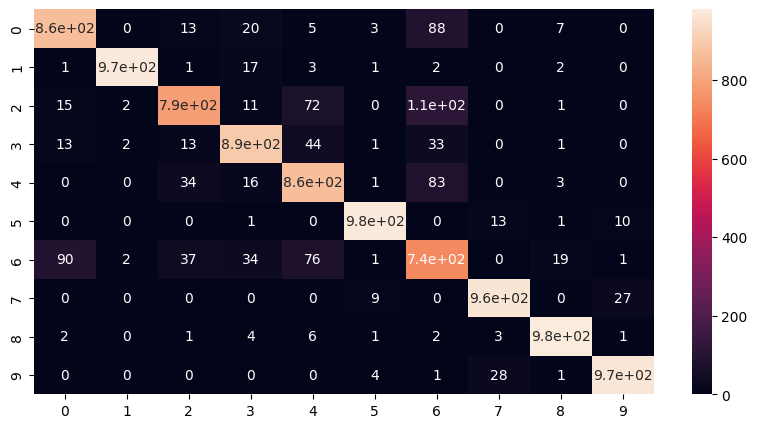

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
cm, sns.heatmap(cm, annot=True)

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split('\n')

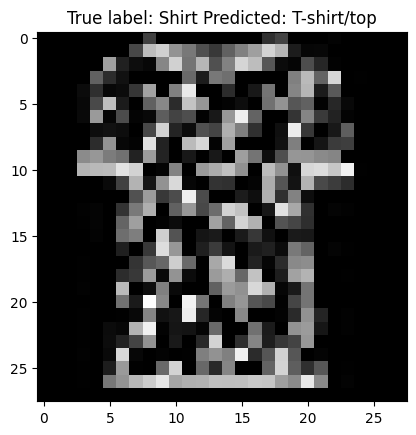

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[y_pred[i]]));